In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
n_samples = 200
n_features = 5

In [4]:
purchase_data = np.random.randint(10, 1000, size=(n_samples, n_features))

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(purchase_data)

In [6]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

C:\Users\likun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\likun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [7]:
cluster_labels = kmeans.labels_

In [9]:
customer_df = pd.DataFrame(purchase_data, columns=[f"Feature_{i+1}" for i in range(n_features)])
customer_df["Cluster"] = cluster_labels

In [10]:
for cluster_id in range(n_clusters):
    cluster_samples = customer_df[customer_df["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id} - Number of customers: {len(cluster_samples)}")
    print(cluster_samples.describe())
    print("\n")

Cluster 0 - Number of customers: 72
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5  Cluster
count   72.000000   72.000000   72.000000   72.000000   72.000000     72.0
mean   476.750000  615.541667  639.555556  269.819444  605.375000      0.0
std    294.942522  276.836706  252.033191  160.997535  248.778562      0.0
min     10.000000   32.000000   38.000000   14.000000   12.000000      0.0
25%    201.250000  409.000000  462.750000  139.000000  445.500000      0.0
50%    480.000000  657.500000  685.000000  286.500000  670.000000      0.0
75%    740.500000  841.000000  838.500000  372.250000  789.500000      0.0
max    976.000000  993.000000  999.000000  653.000000  962.000000      0.0


Cluster 1 - Number of customers: 60
        Feature_1   Feature_2   Feature_3   Feature_4  Feature_5  Cluster
count   60.000000   60.000000   60.000000   60.000000   60.00000     60.0
mean   543.916667  391.300000  250.616667  481.783333  214.45000      1.0
std    287.627307  278.103157

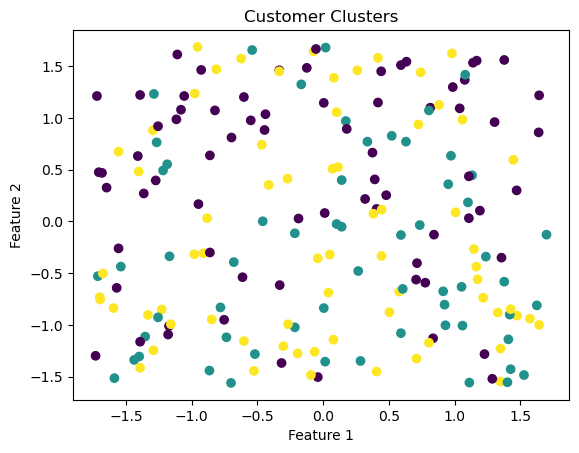

In [11]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Customer Clusters")
plt.show()